In [44]:
# Mounting Google Drive to enable Colab access to files stored in Drive
from google.colab import drive
drive.mount("/content/drive")

# Importing required libraries for data manipulation, visualization, modeling, and explainability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Reading the HR Attrition dataset from Google Drive into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Elivate_Labs_DA_Internship_tasks/HR_Attrition.csv')

# Displaying the few rows of the dataset to verify successful data loading
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [45]:
# Displaying the shape of the dataset to understand the number of rows and columns
print("Shape:", df.shape)

# Displaying the column names to understand the available features in the dataset
df.columns


Shape: (1470, 35)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [46]:
# Displaying dataset information to understand data types, non-null values,
# and overall structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [47]:
# Checking missing values in each column to ensure data completeness
# and confirming that there are no null or empty entries in the dataset
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [49]:
# Displaying the count of each Attrition class (Yes/No)
# to understand how many employees stayed and how many left the company
df['Attrition'].value_counts()


,count
Attrition,
No,1233
Yes,237


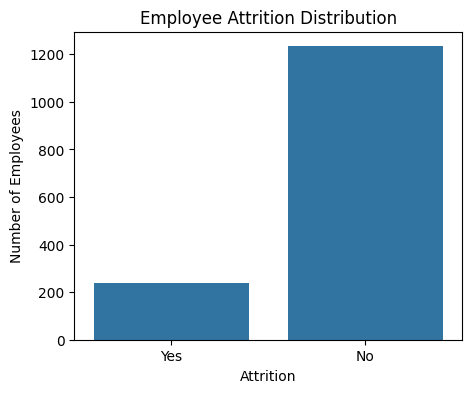

In [50]:
# Creating a figure to control the size of the plot
plt.figure(figsize=(5,4))

# Plotting the distribution of employees based on Attrition status
# to visually compare employees who stayed versus those who left
sns.countplot(x='Attrition', data=df)

# Adding a title to explain what the chart represents
plt.title('Employee Attrition Distribution')

# Labeling the x-axis to show Attrition categories
plt.xlabel('Attrition')

# Labeling the y-axis to show the number of employees
plt.ylabel('Number of Employees')

# Displaying the final plot
plt.show()


#Insight:
The dataset shows a clear class imbalance, with a significantly smaller number of employees leaving the organization (Attrition = Yes) compared to those who remain (Attrition = No). This imbalance indicates that attrition is a relatively rare event and needs to be handled carefully during model training to avoid biased predictions.

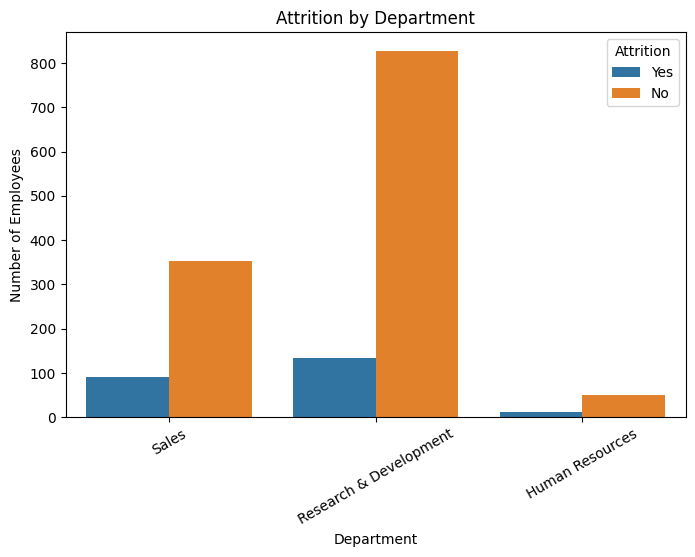

In [51]:
# Creating a figure to define the size of the plot
plt.figure(figsize=(8,5))

# Plotting employee count by department with Attrition as a separate category
# to understand how attrition varies across different departments
sns.countplot(x='Department', hue='Attrition', data=df)

# Adding a title to describe the purpose of the chart
plt.title('Attrition by Department')

# Labeling the x-axis to show different departments
plt.xlabel('Department')

# Labeling the y-axis to show the number of employees
plt.ylabel('Number of Employees')

# Rotating x-axis labels for better readability
plt.xticks(rotation=30)

# Displaying the final plot
plt.show()


#Insight:
Employees in the Sales and Research & Development departments experience higher attrition compared to the Human Resources department. This suggests that job roles, workload, or work pressure in these departments may contribute more to employee turnover.

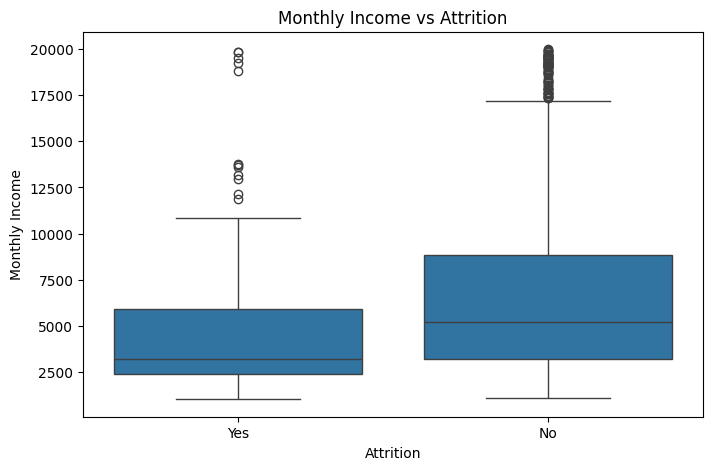

In [52]:
# Creating a figure to set the size of the box plot
plt.figure(figsize=(8,5))

# Plotting a box plot to compare Monthly Income across Attrition categories
# to understand income differences between employees who stayed and those who left
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

# Adding a title to explain what the chart represents
plt.title('Monthly Income vs Attrition')

# Labeling the x-axis to show Attrition categories
plt.xlabel('Attrition')

# Labeling the y-axis to show Monthly Income values
plt.ylabel('Monthly Income')

# Displaying the final plot
plt.show()


#Insight:
Employees with lower monthly income tend to have a higher likelihood of leaving the organization, indicating that compensation may play an important role in employee retention.

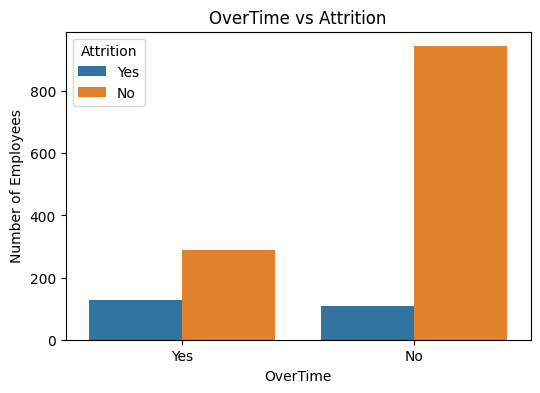

In [53]:
# Creating a figure to define the size of the plot
plt.figure(figsize=(6,4))

# Plotting employee count based on OverTime status with Attrition as a separate category
# to understand how working overtime affects employee attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)

# Adding a title to describe the purpose of the chart
plt.title('OverTime vs Attrition')

# Labeling the x-axis to show OverTime categories
plt.xlabel('OverTime')

# Labeling the y-axis to show the number of employees
plt.ylabel('Number of Employees')

# Displaying the final plot
plt.show()


#Insight:
Employees who work overtime show a significantly higher attrition rate compared to those who do not, suggesting that extended working hours may contribute to employee burnout and turnover.

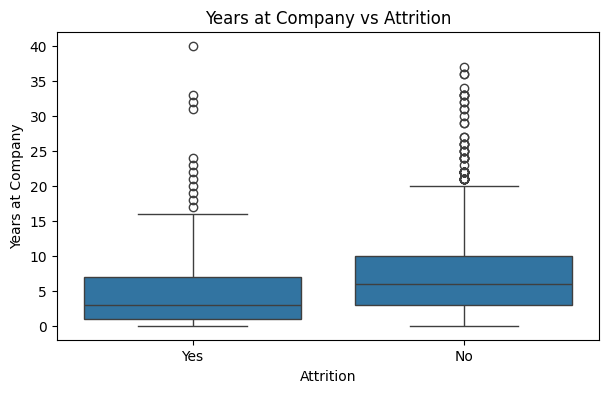

In [54]:
# Creating a figure to set the size of the box plot
plt.figure(figsize=(7,4))

# Plotting a box plot to compare Years at Company across Attrition categories
# to understand how employee tenure relates to attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)

# Adding a title to explain what the chart represents
plt.title('Years at Company vs Attrition')

# Labeling the x-axis to show Attrition categories
plt.xlabel('Attrition')

# Labeling the y-axis to show number of years at the company
plt.ylabel('Years at Company')

# Displaying the final plot
plt.show()


#Insight:
Employees with fewer years at the company are more likely to leave, indicating that early-tenure employees may require better onboarding, support, or engagement to improve retention.

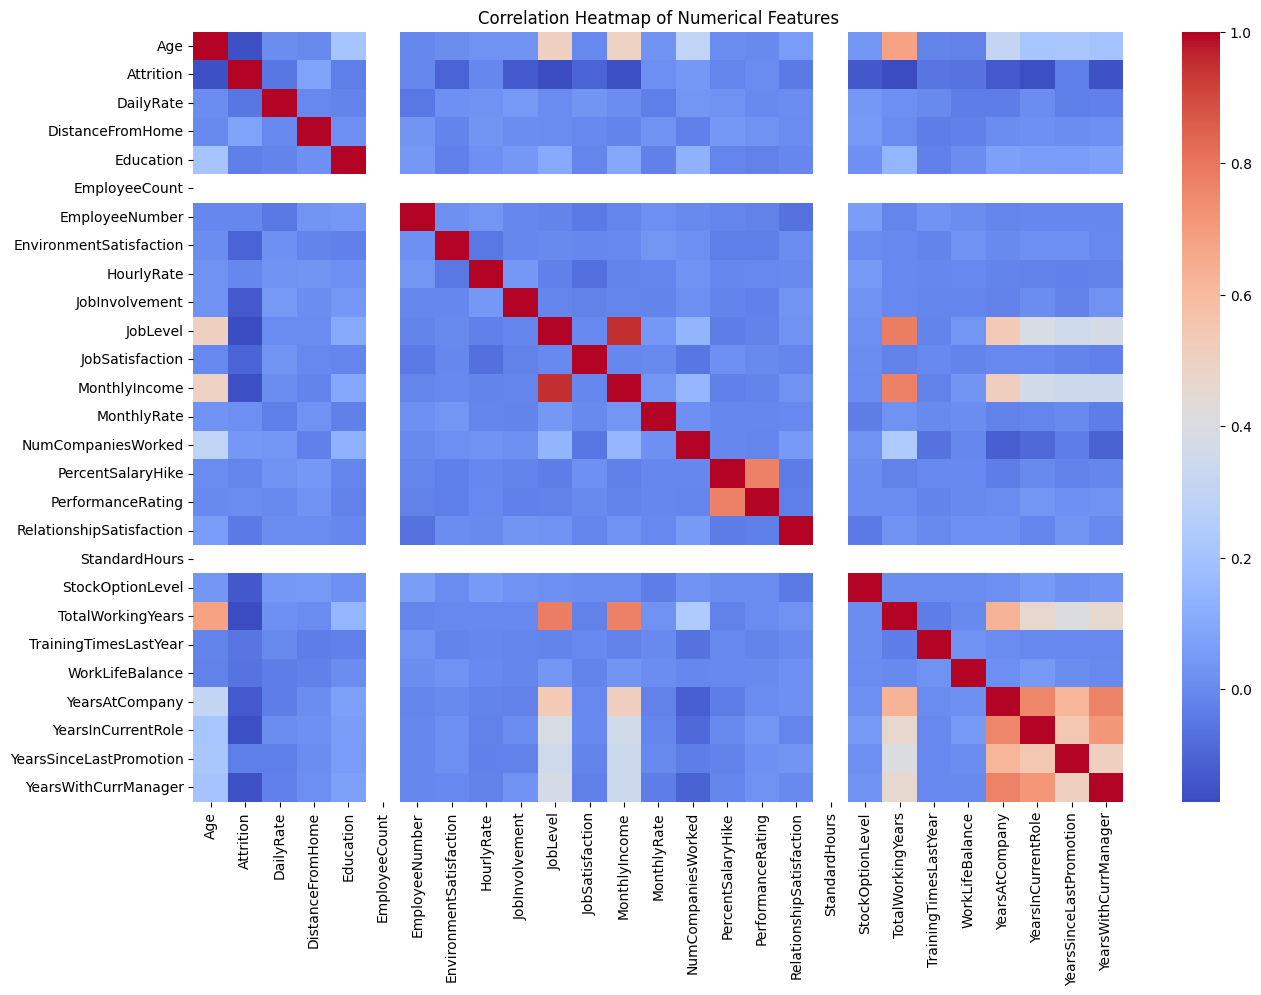

In [55]:
# Creating a copy of the dataset to safely perform correlation analysis
df_corr = df.copy()

# Converting Attrition from categorical (Yes/No) to numerical (1/0)
# to make it suitable for correlation calculation
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Selecting only numerical columns for correlation analysis
numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])

# Creating a figure to define the size of the heatmap
plt.figure(figsize=(15,10))

# Plotting the correlation heatmap to visualize relationships
# between numerical features and attrition
sns.heatmap(numeric_df.corr(), cmap='coolwarm')

# Adding a title to explain what the heatmap represents
plt.title('Correlation Heatmap of Numerical Features')

# Displaying the final heatmap
plt.show()


#Insight:
Attrition shows noticeable correlation with income, job level, and tenure-related features, indicating that compensation and career progression play an important role in employee retention.

In [56]:
# Creating a copy of the original dataset for modeling purposes
df_model = df.copy()

# Converting the target variable Attrition from categorical (Yes/No) to numerical (1/0)
df_model['Attrition'] = df_model['Attrition'].map({'Yes': 1, 'No': 0})

# Dropping columns that do not contribute to prediction or have constant values
df_model.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Initializing label encoder for encoding categorical variables
label_encoder = LabelEncoder()

# Identifying categorical columns to be encoded
categorical_cols = df_model.select_dtypes(include='object').columns

# Encoding categorical features into numerical format for model compatibility
for col in categorical_cols:
    df_model[col] = label_encoder.fit_transform(df_model[col])

# Separating input features and target variable
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Splitting the dataset into training and testing sets
# while maintaining the same class distribution using stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initializing standard scaler for feature scaling
scaler = StandardScaler()

# Applying feature scaling to training data and transforming test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Displaying the shapes of training and test sets to confirm successful splitting
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1176, 30)
Test set shape: (294, 30)


In [57]:
# Importing Logistic Regression algorithm from sklearn
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
# setting max_iter to ensure proper convergence during training
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Training the Logistic Regression model using the training dataset
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [58]:
# Predicting Attrition outcomes on the test dataset
# to evaluate how well the trained model performs on unseen data
y_pred = log_reg.predict(X_test)


In [59]:
# Importing evaluation metrics to assess model performance
from sklearn.metrics import accuracy_score, classification_report

# Calculating and displaying the accuracy of the model
# to understand the overall correctness of predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

# Displaying the classification report
# to evaluate precision, recall, and F1-score for each class
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8741496598639455

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



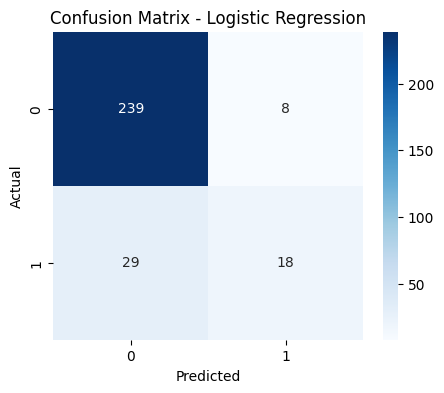

In [60]:
# Importing confusion matrix metric for evaluating classification results
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix to compare actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# Creating a figure to set the size of the heatmap
plt.figure(figsize=(5,4))

# Plotting the confusion matrix as a heatmap
# to clearly visualize correct and incorrect predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Labeling the x-axis to show predicted classes
plt.xlabel('Predicted')

# Labeling the y-axis to show actual classes
plt.ylabel('Actual')

# Adding a title to describe the chart
plt.title('Confusion Matrix - Logistic Regression')

# Displaying the final confusion matrix plot
plt.show()


In [61]:
# Creating a DataFrame to analyze feature importance using model coefficients
# to understand how each feature influences employee attrition
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Displaying the top 10 features with the highest impact on attrition
feature_importance.head(10)

,Feature,Coefficient
18,OverTime,0.781960
28,YearsSinceLastPromotion,0.481185
3,Department,0.471278
17,NumCompaniesWorked,0.449191
4,DistanceFromHome,0.315124
14,MaritalStatus,0.295806
26,YearsAtCompany,0.244043
8,Gender,0.141728
20,PerformanceRating,0.141494
5,Education,0.034646


In [62]:
# Importing SMOTE technique to handle class imbalance in the dataset
from imblearn.over_sampling import SMOTE

# Initializing SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Applying SMOTE to the training data to balance the Attrition classes
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Displaying class distribution before applying SMOTE
# to show the original imbalance in the training data
print("Before SMOTE:\n", y_train.value_counts())

# Displaying class distribution after applying SMOTE
# to confirm that both classes are now balanced
print("\nAfter SMOTE:\n", pd.Series(y_train_smote).value_counts())


Before SMOTE:
 Attrition
0    986
1    190
Name: count, dtype: int64

After SMOTE:
 Attrition
0    986
1    986
Name: count, dtype: int64


In [63]:
# Initializing a new Logistic Regression model for training on balanced data
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)

# Training the Logistic Regression model using SMOTE-balanced training data
log_reg_smote.fit(X_train_smote, y_train_smote)

# Predicting Attrition outcomes on the test dataset
# to evaluate model performance after handling class imbalance
y_pred_smote = log_reg_smote.predict(X_test)


In [64]:
# Importing evaluation metrics to assess model performance after applying SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculating and displaying model accuracy after handling class imbalance
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))

# Displaying the classification report after SMOTE
# to evaluate precision, recall, and F1-score for each class
print("\nClassification Report after SMOTE:\n")
print(classification_report(y_test, y_pred_smote))


Accuracy after SMOTE: 0.7721088435374149

Classification Report after SMOTE:

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       247
           1       0.39      0.79      0.52        47

    accuracy                           0.77       294
   macro avg       0.67      0.78      0.69       294
weighted avg       0.86      0.77      0.80       294



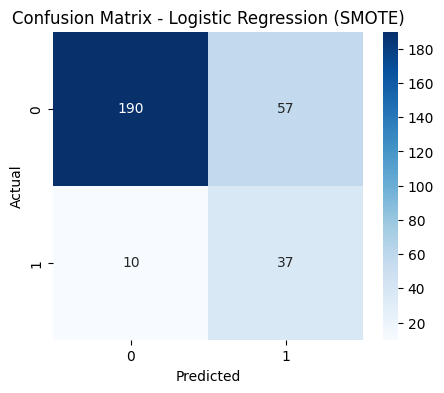

In [65]:
# Creating the confusion matrix for predictions made by the SMOTE-trained model
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Creating a figure to set the size of the heatmap
plt.figure(figsize=(5,4))

# Plotting the confusion matrix as a heatmap
# to visualize correct and incorrect predictions after SMOTE
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')

# Labeling the x-axis to show predicted classes
plt.xlabel('Predicted')

# Labeling the y-axis to show actual classes
plt.ylabel('Actual')

# Adding a title to describe the chart
plt.title('Confusion Matrix - Logistic Regression (SMOTE)')

# Displaying the final confusion matrix plot
plt.show()


AUC Score (SMOTE Model): 0.8061848565767938


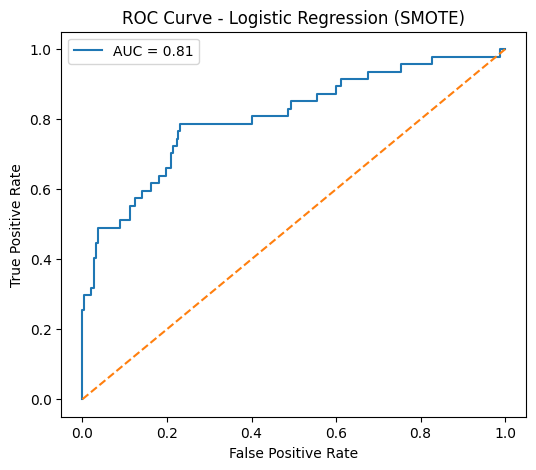

In [66]:
# Importing ROC curve and AUC score metrics for evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score

# Predicting probabilities for the positive class (Attrition = Yes)
# to calculate ROC curve and AUC score
y_prob_smote = log_reg_smote.predict_proba(X_test)[:, 1]

# Computing False Positive Rate, True Positive Rate, and thresholds
# for plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_smote)

# Calculating and displaying the AUC score
# to measure the model’s ability to distinguish between classes
auc_score = roc_auc_score(y_test, y_prob_smote)
print("AUC Score (SMOTE Model):", auc_score)

# Creating a figure to define the size of the ROC curve plot
plt.figure(figsize=(6,5))

# Plotting the ROC curve using false positive and true positive rates
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')

# Plotting the diagonal reference line for random classifier
plt.plot([0,1], [0,1], linestyle='--')

# Labeling the x-axis to show false positive rate
plt.xlabel('False Positive Rate')

# Labeling the y-axis to show true positive rate
plt.ylabel('True Positive Rate')

# Adding a title to explain the chart
plt.title('ROC Curve - Logistic Regression (SMOTE)')

# Displaying the legend on the plot
plt.legend()

# Displaying the final ROC curve
plt.show()


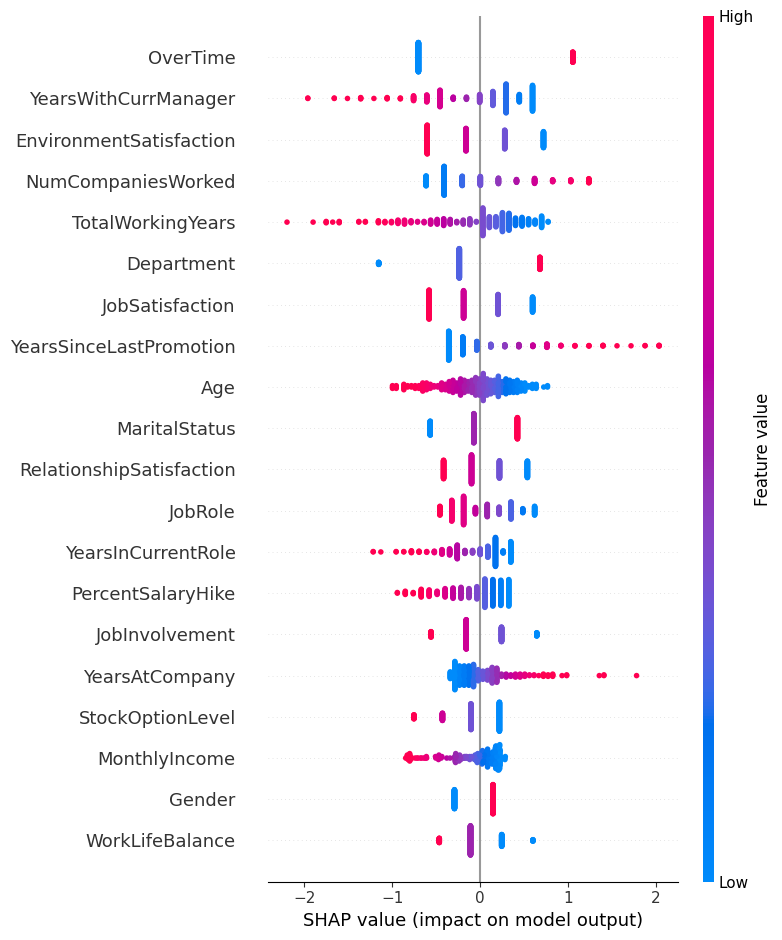

In [67]:
# Creating SHAP explainer for the trained Logistic Regression model
# to understand how each feature contributes to attrition prediction
explainer = shap.Explainer(log_reg_smote, X_train_smote)

# Computing SHAP values on the test dataset
# to explain model predictions on unseen employee data
shap_values = explainer(X_test)

# Displaying SHAP summary plot
# to visualize global feature importance and their impact on attrition
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


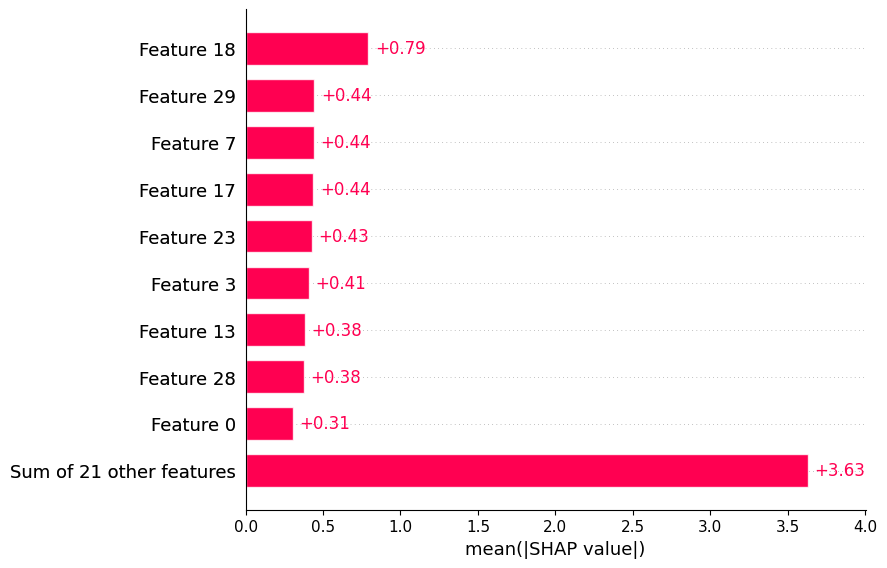

In [70]:
# Displaying SHAP bar plot
# to show the top features driving employee attrition based on importance
shap.plots.bar(shap_values, max_display=10)
